In [29]:
# 模型灵敏度分析
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import math

# 定义模型输入
problem = {
    'num_vars': 3,
    'names': ['tem', 'humi', 'time'],
    'bounds': [[0, 50],
               [0, 5],
               [0, 30]]
}

In [42]:
def temA(X):
    if X > 0 and X < 25:
        return (-0.00729 * (X - 25)* (X - 25) + 81.9401)
    else:
        return (-0.0920 * (X - 25)* (X - 25) + 81.9401)

def temB(X):
    if X > 0 and X < 29.8:
        return (-0.00889 * (X - 29.8)* (X - 29.8) + 48.8231)
    else:
        return (-1086 * (X - 29.8)* (X - 29.8) + 48.8231)

In [43]:
def EA(X):
    if X < 0.45 and X > 0:
        return 1.8794 * X
    elif X >= 0.45 and X < 3.46:
        return 0.8638 * X
    else:
        return -0.6754 * X

def EB(X):
    if X > 0 and X < 0.47:
        return 0.67886 * X
    elif X >= 0.47 and X < 2.55:
        return 1.358 * X
    else:
        return -0.3602 * X

In [44]:
import math
def pA(X):
    return 2.581 * math.pow(10, -6) * math.pow(X, 6) - 2.544 * math.pow(10, -4) * math.pow(X, 5) + 9.348 * math.pow(10, -3) * math.pow(X, 4) - 0.153 * math.pow(X, 3) + 1.001 * math.pow(X, 2) - 1.57 * X + 14.58

def pB(X):
    return 7.297 * math.pow(10, -6) * math.pow(X, 6) - 1.631 * math.pow(10, -4) * math.pow(X, 5) + 9.986 * math.pow(10, -3) * math.pow(X, 4) - 0.2468 * math.pow(X, 3) + 2.39 * math.pow(X, 2) - 5.09 * X + 18.18
 

(80000, 3) (80000,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Parameter S1 S1_conf ST ST_conf
tem 0.421808 0.018170 0.422337 0.012886
humi 0.109576 0.008531 0.109690 0.003113
time 0.467618 0.015614 0.468667 0.013899

Parameter_1 Parameter_2 S2 S2_conf
tem humi 0.000088 0.024577
tem time 0.001249 0.031802
humi time 0.000419 0.016096

S1: [0.42180819 0.10957565 0.46761763]
x1-x2: 8.809078713793717e-05
x1-x3: 0.0012486444154824472
x2-x3: 0.00041902350213735007


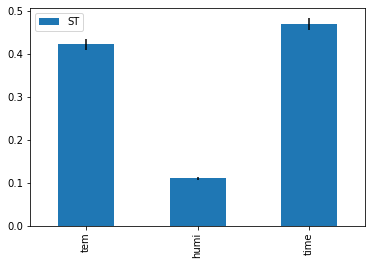

In [52]:

def evaluate(X):
    return np.array([temA(x[0]) + EA(x[1]) + pA(x[2]) for x in X])
	
# 样本生成

param_values = saltelli.sample(problem,10000)

# 运行模型
Y = evaluate(param_values)
print(param_values.shape,Y.shape)
Si = sobol.analyze(problem,Y,print_to_console=True)
print()

# 一阶灵敏度
print('S1:', Si['S1']) 

# 二阶林敏度
print("x1-x2:", Si['S2'][0, 1])
print("x1-x3:", Si['S2'][0, 2])
print("x2-x3:", Si['S2'][1, 2])

from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot

Si_df = Si.to_df()
barplot(Si_df[0])
plot.savefig("picture/sensitivity.eps")
plot.show()